In [348]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelBinarizer, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV, RFE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1.Исследовательский анализ данных

## 1.1 Словесное описание признаков

* PassengerId - Уникальный идентификатор пассажира. 
* Survived - (Целевой столбец) Выжил ли пассажир или нет. Значения: 1 - выжил, 0 - не выжил.
* Pclass - Класс билета. Значения: 1 = 1st, 2 = 2nd, 3 = 3rd
* Name - Имя пассажира. 
* Sex - Пол пассажира. Значения: male, female.
* Age - Возраст пассажира. Значения: численные.
* SibSp - Количество братьев и сестер / супругов на борту Титаника. Значения: численные.
* Parch - Количество родителей / детей на борту Титаника. Значения: численные.
* Ticket - Номер билет пассажира. Значения: уникальный идентификатор билета (строковое).
* Fare - Пассажирский тариф. Значения: численные.
* Cabin - Номер каюты. Значения: строковый идентификатор каюты.
* Embarked - Порт посадки. Значения: C = Cherbourg, Q = Queenstown, S = Southampton.

## 1.2 Загрузка данных, общее описание набора данных

* Загрузка и первый взгляд на данные.

In [349]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [350]:
print(df.shape)
print(df.Survived.value_counts())
print(df.Survived.value_counts(normalize=True))

(891, 12)
0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


Общая информация:

In [351]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Первичные выводы:**
* У большинства пассажиров (50%) класс билета - 3. 
* Возраст пассажиров в выборке от 5 месяцев до 80 лет. Предполагая, что возраст имеет нормальное распределение, 68% пассажиров имеют возраст от 15 до 43 лет.
* У большинства пассажиров (50%) на борту не было братьев, сестёр или супругов. 25% всей выборки имели 1 братьев, сестёр или супругов на борту, а максимум один пассажир на борту имеет 8 братьев, сестёр или супругов.
* Основная часть (75%) пассажиров была на борту без родителей или детей. Максимум один пассажир имеет 8 родственников.
* Предполагая, что тариф имеет нормальное распределение, 68% пассажиров запалатили от 0 до 81.
* **Как уже было сказано выше среди выживших наблюдается дисбаланс классов: в данной выборке выживших на 20% меньше.**

In [352]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turpin, Mrs. William John Robert (Dorothy Ann ...",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


**Первичные выводы**
* Все имена пассажиров уникальны.
* В данной выборке мужчины составляют 64%.
* Среди 891 записи уникальных номеров билетов только 681. Предположительно это связано с тем, что один билет мог быть на несколько человек, например, на одну семью.
* Только в 23% записей указана каюта пассажира. В одной каюте могли располагаться до 4 человек.
* 72% всех пассажиров сели на борт в Southampton.

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Можно наблюдать небольшое количество пропусков в колонках Age и Embarked.

Очень много пропусков в столбце Cabin.

## 1.3 Визуальный и статистический анализ.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

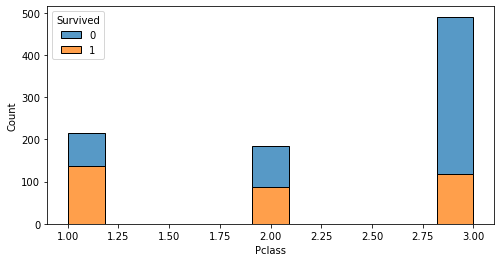

In [354]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="Pclass", hue = "Survived", multiple="stack")

На данном графике видно, что:
* Больше всего было пассажиров 3 класса, но из них большинство не выжило.
* Количество выживших разных классов примерно равное.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

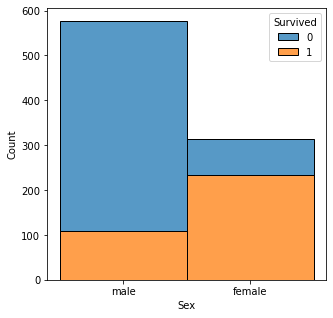

In [355]:
plt.figure(figsize=(5,5))
sns.histplot(data=df, x="Sex", hue = "Survived", multiple="stack")

На данном графике видно, что:
* Большинство мужчин (~77%) не выжило
* Большинство женщин (~65%) выжило

<AxesSubplot:xlabel='Age', ylabel='Count'>

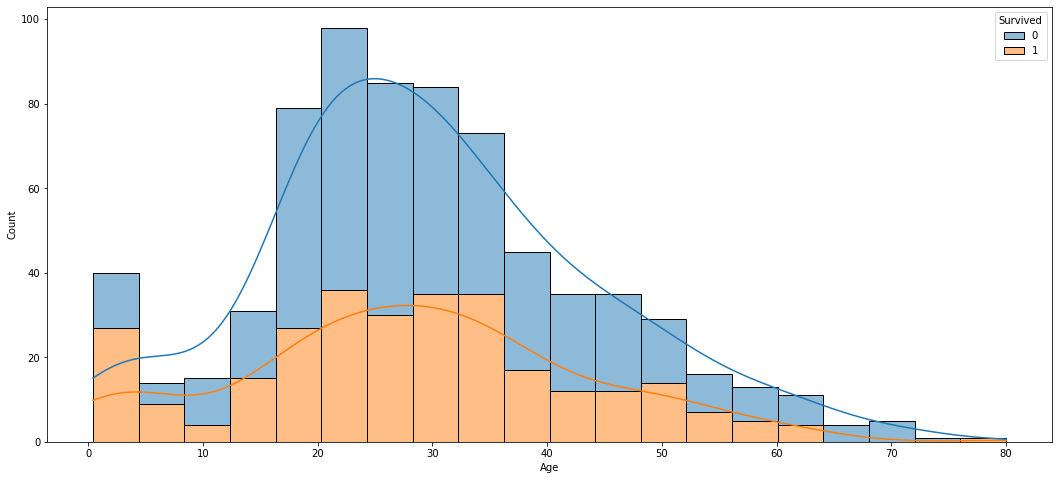

In [356]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="Age",hue = "Survived",kde=True, multiple="stack")

На данном графике видно, что: 
* Распределение возраста близко к нормальному, только в самом начале есть выброс.
* Большинство детей до 10 лет выжило

<AxesSubplot:xlabel='HasFamily', ylabel='Count'>

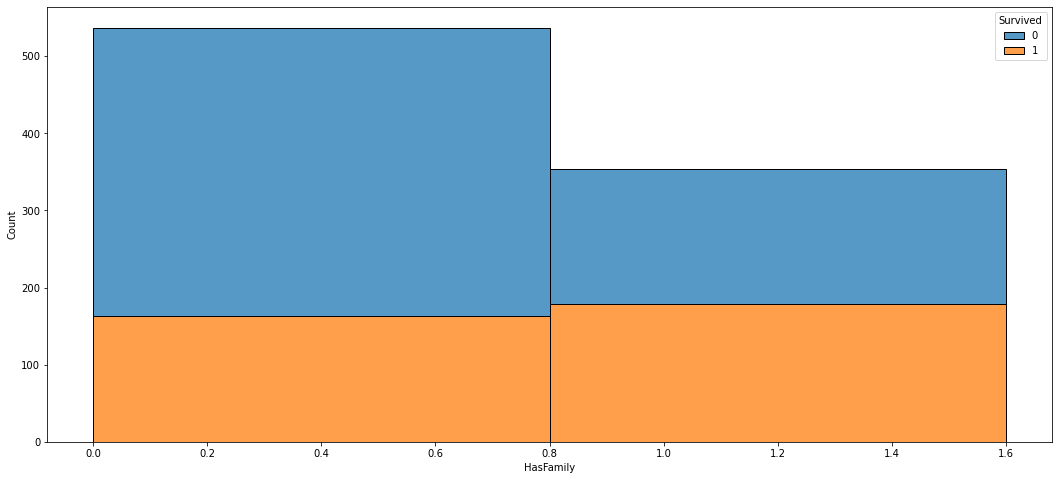

In [357]:
plt.figure(figsize=(18,8))
t = (df.Parch > 0) | (df.SibSp > 0)
t = t.apply(lambda x: int(x))
t.name = "HasFamily"
sns.histplot(data=df.join(t), x="HasFamily", hue='Survived', binwidth=0.8, multiple="stack")

Из данного графика видно, что:
* Те у кого были родственники на борту раздулилились на выживших/не выживших в пропорции 1:1.
* Те у кого не было родственников на борту разделились на выживших/не выживших в пропорции 1:2. 

In [358]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [359]:
df['Embarked'] = df['Embarked'].fillna('S')

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

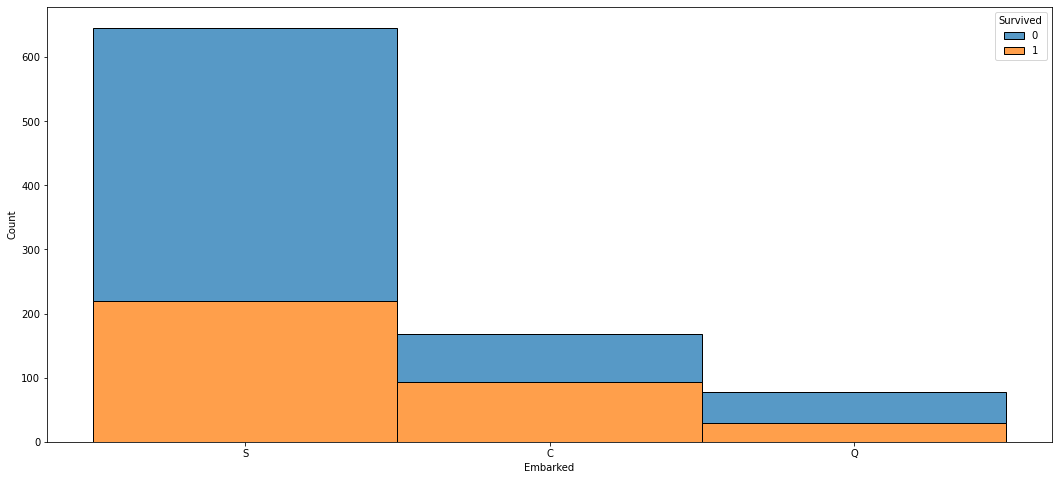

In [360]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="Embarked", hue='Survived',multiple="stack")

На данном графике видно, что: 
* Пассажиры из порта Southampton разделились на выживших/не выживших в пропорции 1:2 
* Пассажиры из порта Queenstown разделились примерно в той же пропорции, что и пассажиры из порта Southampton
* Только пассажиры из порта Cherbourg в большинстве своём выжили, в остальных портах пассажиры преимущественно утонули

<AxesSubplot:xlabel='HasCabin', ylabel='Count'>

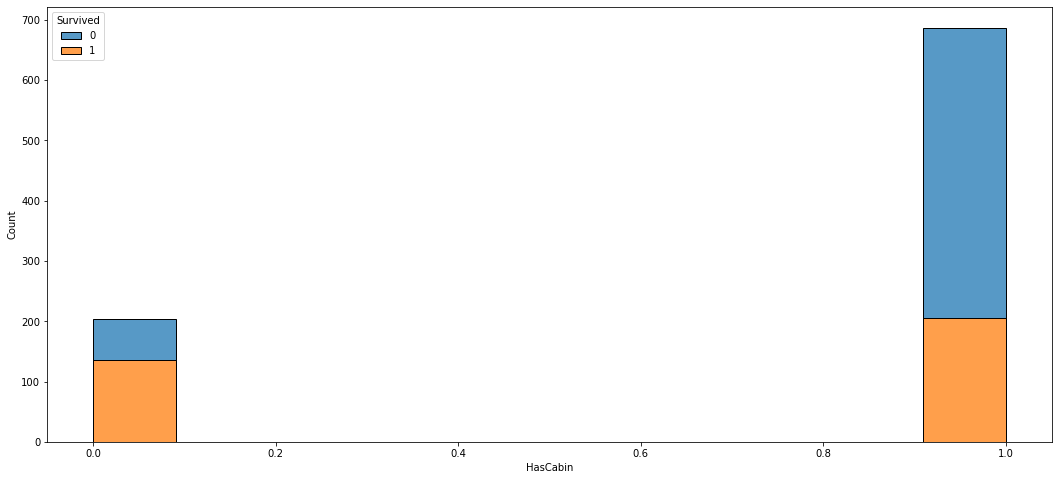

In [361]:
plt.figure(figsize=(18,8))
t = (df.Cabin.isna())
t = t.apply(lambda x: int(x))
t.name = "HasCabin"
sns.histplot(data=df.join(t), x="HasCabin", hue='Survived', multiple="stack")

Из данного графика видно, что большинство из тех, у кого есть кабина, не выжило, а большинство тех у кого кабина не указана - выжили.

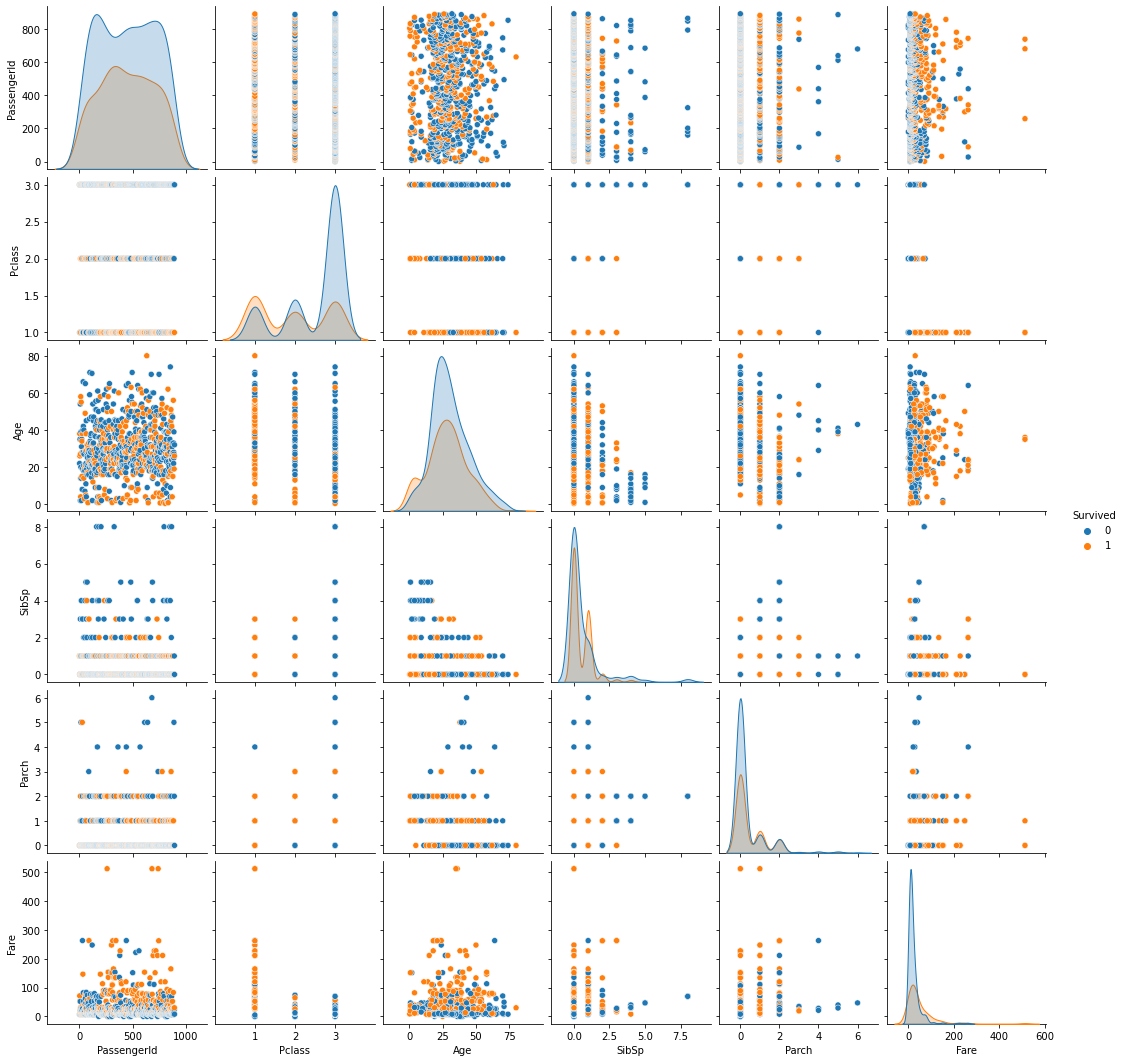

In [362]:
columns_to_plot =['Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df, hue='Survived');

Из данных графиков рассеивания можно сделать следующие выводы:
* Большинство пассажиров первого класса выжили.
* Большинство пассажиров третьего класса не выжили.
* Чем больше возраст пассажира, тем меньше у него братьев/сестер/супругов на борту Титаника.С родителями/детьми такой последовательности не прослеживается.
* Также есть интересный момент с количеством родственников на борту и стоимостью билета. На паре было предположение, что стоимость зависит от количества родственников на борту, но на графиках Fare/SibSp и Fare/Parch можно видеть, что есть пассажир у которого нет родственников, но у него самая высокая стоимость билета.

### Корреляционная матрица

<AxesSubplot:>

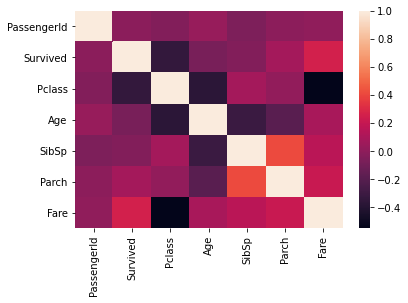

In [363]:
sns.heatmap(df.corr())

Исходя из полученой матрицы можно сделать выводы, что:

* между признаками Pclass и Fare наблюдается обратная корреляция
* между признаками Parch и SibSp наблюдается прямая корреляция (что в принипе логично)

У остальных признаков корреляция не наблюдается.

# 2. Заполнение пропусков и обработка выбросов в данных

## 2.1 Заполнение пропусков

In [364]:
df.Age = df.Age.fillna(df.Age.median())

In [365]:
# Возможно данный столбец не стоит учитывать, ввиду отсутствия большого количества данных.
# df.Cabin = df.Cabin.fillna(df.Cabin.mode()[0])

In [366]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [368]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2.2 Обработка выбросов

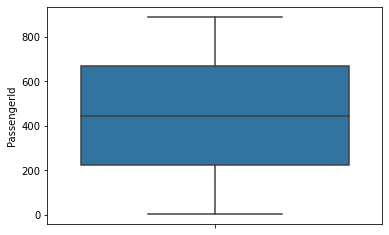

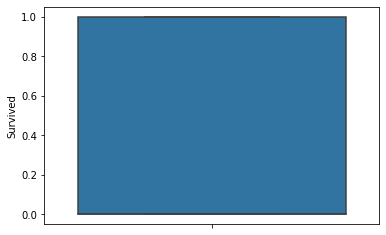

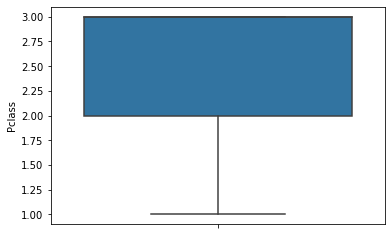

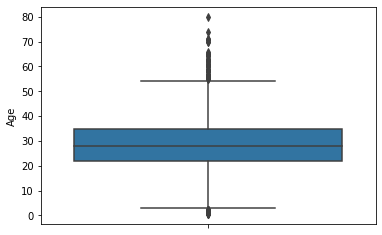

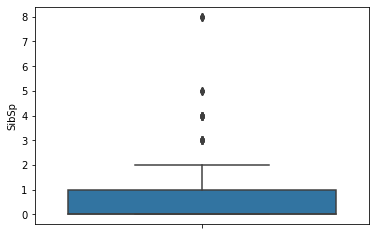

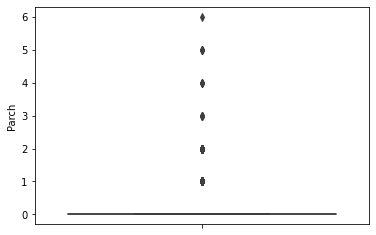

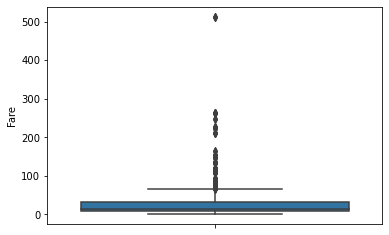

In [369]:
for i in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot( y=df[i] );
    plt.show()

Из *\"усатых ящиков\"* видно, что выбросы есть только у признаков Age, SibSp, Parch и Fare. Так как данные не являются ошибочными, то выбросы надо не удалять, а сгладить.

Посмотрим на количество выбросов в каждом столбце:

In [370]:
def search_outliers(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((feature < lower_bound) | (feature > upper_bound))[0]
for feature in df.select_dtypes(include=['float64', 'int64']).drop(['PassengerId','Pclass'], 1).columns:
    sum_outliers = len(search_outliers(df[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df[feature].shape[0]} наблюдений")

Признак Survived содержит 0 выбросов из 891 наблюдений
Признак Age содержит 66 выбросов из 891 наблюдений
Признак SibSp содержит 46 выбросов из 891 наблюдений
Признак Parch содержит 213 выбросов из 891 наблюдений
Признак Fare содержит 116 выбросов из 891 наблюдений


**1) Сглаживание логорифмом:**

In [371]:
df_with_log_smooth = df.copy()
for feature in df_with_log_smooth.select_dtypes(include=['float64', 'int64']).drop(['PassengerId','Pclass'], 1).columns:
    df_with_log_smooth[feature] = np.log1p(df_with_log_smooth[feature])
    sum_outliers = len(search_outliers(df_with_log_smooth[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df[feature].shape[0]} наблюдений")

Признак Survived содержит 0 выбросов из 891 наблюдений
Признак Age содержит 71 выбросов из 891 наблюдений
Признак SibSp содержит 12 выбросов из 891 наблюдений
Признак Parch содержит 213 выбросов из 891 наблюдений
Признак Fare содержит 31 выбросов из 891 наблюдений


In [372]:
df_with_log_smooth

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000,3,"Braund, Mr. Owen Harris",male,3.135494,0.693147,0.000000,A/5 21171,2.110213,NaN,S
1,2,0.693147,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.663562,0.693147,0.000000,PC 17599,4.280593,C85,C
2,3,0.693147,3,"Heikkinen, Miss. Laina",female,3.295837,0.000000,0.000000,STON/O2. 3101282,2.188856,NaN,S
3,4,0.693147,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.583519,0.693147,0.000000,113803,3.990834,C123,S
4,5,0.000000,3,"Allen, Mr. William Henry",male,3.583519,0.000000,0.000000,373450,2.202765,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.000000,2,"Montvila, Rev. Juozas",male,3.332205,0.000000,0.000000,211536,2.639057,NaN,S
887,888,0.693147,1,"Graham, Miss. Margaret Edith",female,2.995732,0.000000,0.000000,112053,3.433987,B42,S
888,889,0.000000,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,3.367296,0.693147,1.098612,W./C. 6607,3.196630,NaN,S
889,890,0.693147,1,"Behr, Mr. Karl Howell",male,3.295837,0.000000,0.000000,111369,3.433987,C148,C


**2) Сглаживание по верхней и нижней границам**

In [373]:
df_with_bound_smooth = df.copy()
def outliers_smoothing(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    feature = np.where(feature < lower_bound, lower_bound, feature)
    feature = np.where(feature > upper_bound, upper_bound, feature)
    return feature
for feature in df.select_dtypes(include=['float64', 'int64']).drop(['PassengerId','Pclass'], 1).columns:
    df_with_bound_smooth[feature] = outliers_smoothing(df_with_bound_smooth[feature])
    sum_outliers = len(search_outliers(df_with_bound_smooth[feature]))
    print(f"Признак {feature} содержит {sum_outliers} выбросов из {df[feature].shape[0]} наблюдений")

Признак Survived содержит 0 выбросов из 891 наблюдений
Признак Age содержит 0 выбросов из 891 наблюдений
Признак SibSp содержит 0 выбросов из 891 наблюдений
Признак Parch содержит 0 выбросов из 891 наблюдений
Признак Fare содержит 0 выбросов из 891 наблюдений


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. Преобразование признаков

## 3.1 Преобразование категориальных признаков в количественные

### 3.1.1 ~~LabelEncode~~

Если верить статье на [хабре](https://habr.com/ru/company/ods/blog/326418/) данный метод не даст особой пользы, потому что данная операция создаёт евклидово пространство над категориальными признаками, что не имеет смысла в нашем случае.

Единственный признак, которому имеет смысл применить данный метод, это Embarked.

In [375]:
#TODO: переделать с помощью skilearn.preprocessing.LabelEncode
def get_sorted_classes_by_target_rate(data, column_name):
    new_data = data.copy()
    new_data = new_data.groupby(column_name).Survived.value_counts(normalize=True).to_frame()
    new_data = new_data.rename(columns={"Survived":"Rate"}, inplace=False).reset_index()
    survived = new_data[new_data.Survived == 1].sort_values("Rate", ascending=False)
    not_survived = new_data[new_data.Survived == 0].sort_values("Rate", ascending=True)
    return [survived, not_survived]
def get_mapper(data, column_name):
    [positive, negative] = get_sorted_classes_by_target_rate(data, column_name)
    classes = np.hstack((positive[column_name].values, negative[-negative[column_name].isin(positive[column_name].values)][column_name].values))
    mapper = {k:v for v, k in enumerate(classes)}
    return mapper

Мапперы для всех дискретных признаков:

In [376]:
embarked_mapper = get_mapper(df, "Embarked")
pclass_mapper = get_mapper(df, "Pclass")
sex_mapper = get_mapper(df, "Sex")

In [377]:
embarked_mapper

{'C': 0, 'Q': 1, 'S': 2}

In [378]:
df_log_label = df_with_log_smooth.copy()
df_bound_label = df_with_bound_smooth.copy()
df_not_smooth_label = df.copy()
df_log_label['Embarked'] = df_log_label['Embarked'].apply(lambda x: embarked_mapper[x])
df_bound_label['Embarked'] = df_bound_label['Embarked'].apply(lambda x: embarked_mapper[x])
df_not_smooth_label['Embarked'] = df_not_smooth_label['Embarked'].apply(lambda x: embarked_mapper[x])
df_not_smooth_label.Embarked.unique()

array([2, 0, 1], dtype=int64)

### 3.1.2 One-hot encoding

Применим данный метод к признакам Pclass, Embarked и Sex.

In [321]:
df_with_log_smooth = df_with_log_smooth.drop('Pclass', axis=1).join(pd.get_dummies(df_with_log_smooth['Pclass'], prefix='Pclass'))
df_with_bound_smooth = df_with_bound_smooth.drop('Pclass', axis=1).join(pd.get_dummies(df_with_bound_smooth['Pclass'], prefix='Pclass'))
df = df.drop('Pclass', axis=1).join(pd.get_dummies(df['Pclass'], prefix='Pclass'))

In [322]:
df_with_log_smooth = df_with_log_smooth.drop('Embarked', axis=1).join(pd.get_dummies(df_with_log_smooth['Embarked'], prefix='Embarked'))
df_with_bound_smooth = df_with_bound_smooth.drop('Embarked', axis=1).join(pd.get_dummies(df_with_bound_smooth['Embarked'], prefix='Embarked'))
df = df.drop('Embarked', axis=1).join(pd.get_dummies(df['Embarked'], prefix='Embarked'))

In [347]:
df_with_log_smooth = df_with_log_smooth.drop('Sex', axis=1).join(pd.get_dummies(df_with_log_smooth['Sex'], prefix='Sex', drop_first=True))
df_with_bound_smooth = df_with_bound_smooth.drop('Sex', axis=1).join(pd.get_dummies(df_with_bound_smooth['Sex'], prefix='Sex', drop_first=True))
df = df.drop('Sex', axis=1).join(pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True))

KeyError: "['Sex'] not found in axis"

In [324]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1


In [325]:
df_with_log_smooth.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,1,0.000000,"Braund, Mr. Owen Harris",3.135494,0.693147,0.0,A/5 21171,2.110213,NaN,0,0,1,0,0,1,1
1,2,0.693147,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.663562,0.693147,0.0,PC 17599,4.280593,C85,1,0,0,1,0,0,0
2,3,0.693147,"Heikkinen, Miss. Laina",3.295837,0.000000,0.0,STON/O2. 3101282,2.188856,NaN,0,0,1,0,0,1,0
3,4,0.693147,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.583519,0.693147,0.0,113803,3.990834,C123,1,0,0,0,0,1,0
4,5,0.000000,"Allen, Mr. William Henry",3.583519,0.000000,0.0,373450,2.202765,NaN,0,0,1,0,0,1,1


In [326]:
df_with_bound_smooth.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,65.6344,C85,1,0,0,1,0,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,1,0,0,0,0,1,0
4,5,0.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,NaN,0,0,1,0,0,1,1


## 3.2 Шкалирование данных

### 3.2.1 Нормализация

In [327]:
min_max_scaler = MinMaxScaler()
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [328]:
features_to_normalize = ['Age', 'SibSp', 'Parch', 'Fare']

df_with_log_smooth_minmax = df_with_log_smooth.copy()
df_with_bound_smooth_minmax = df_with_bound_smooth.copy()
df_minmax = df.copy()

for feature in features_to_normalize:
    df_with_log_smooth_minmax[feature] = min_max_scaler.fit_transform(df_with_log_smooth_minmax[[feature]])
    df_with_bound_smooth_minmax[feature] = min_max_scaler.fit_transform(df_with_bound_smooth_minmax[[feature]])
    df_minmax[feature] = min_max_scaler.fit_transform(df_minmax[[feature]])

In [329]:
df_minmax.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.363679,0.065376,0.063599,0.062858,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,257.353842,0.486592,0.163605,0.137843,0.134343,0.096995,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,0.346569,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.2.2 Стандартизация

#### 3.2.2.1 StandardScaler

In [330]:
standard_scaler = StandardScaler()
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_with_log_smooth = df_with_log_smooth.drop('Sex', axis=1).join(pd.get_dummies(df_with_log_smooth['Sex'], prefix='Sex', drop_first=True))
df_with_bound_smooth = df_with_bound_smooth.drop('Sex', axis=1).join(pd.get_dummies(df_with_bound_smooth['Sex'], prefix='Sex', drop_first=True))
df = df.drop('Sex', axis=1).join(pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True))

In [331]:
df_with_log_smooth_standard = df_with_log_smooth.copy()
df_with_bound_smooth_standard = df_with_bound_smooth.copy()
df_standard = df.copy()

for feature in features_to_normalize:
    df_with_log_smooth_standard[feature] = standard_scaler.fit_transform(df_with_log_smooth_standard[[feature]])
    df_with_bound_smooth_standard[feature] = standard_scaler.fit_transform(df_with_bound_smooth_standard[[feature]])
    df_standard[feature] = standard_scaler.fit_transform(df_standard[[feature]])

In [332]:
df_standard.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,3.841546e-16,3.456519e-16,6.716164e-17,-4.373606e-17,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,257.353842,0.486592,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,1.000000,0.000000,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.2.2.2 RobustScaler

In [333]:
robust_scaler = RobustScaler()
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [334]:
df_with_log_smooth_robust = df_with_log_smooth.copy()
df_with_bound_smooth_robust = df_with_bound_smooth.copy()
df_robust = df.copy()

for feature in features_to_normalize:
    df_with_log_smooth_robust[feature] = standard_scaler.fit_transform(df_with_log_smooth_robust[[feature]])
    df_with_bound_smooth_robust[feature] = standard_scaler.fit_transform(df_with_bound_smooth_robust[[feature]])
    df_robust[feature] = standard_scaler.fit_transform(df_robust[[feature]])

In [335]:
df_robust.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,3.841546e-16,3.456519e-16,6.716164e-17,-4.373606e-17,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,257.353842,0.486592,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,1.000000,0.000000,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Pclass_1     891 non-null    uint8  
 10  Pclass_2     891 non-null    uint8  
 11  Pclass_3     891 non-null    uint8  
 12  Embarked_C   891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
 15  Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(7)
memory usage: 68.9+ KB


In [337]:
#Без шкалирования
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = df.Survived
X_log = df_with_log_smooth.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_log = df_with_log_smooth.Survived
X_bound = df_with_bound_smooth.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_bound = df_with_bound_smooth.Survived
#С шкалированием
#MinMax
X_minmax = df_minmax.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_minmax = df_minmax.Survived
X_log_minmax = df_with_log_smooth_minmax.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_log_minmax = df_with_log_smooth_minmax.Survived
X_bound_minmax = df_with_bound_smooth_minmax.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_bound_minmax = df_with_bound_smooth_minmax.Survived
#Standard
X_standard = df_standard.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_standard = df_standard.Survived
X_log_standard = df_with_log_smooth_standard.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_log_standard = df_with_log_smooth_standard.Survived
X_bound_standard = df_with_bound_smooth_standard.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_bound_standard = df_with_bound_smooth_standard.Survived
#Robust
X_robust = df_robust.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_robust = df_robust.Survived
X_log_robust = df_with_log_smooth_robust.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_log_robust = df_with_log_smooth_robust.Survived
X_bound_robust = df_with_bound_smooth_robust.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y_bound_robust = df_with_bound_smooth_robust.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_bound_train, X_bound_test, y_bound_train, y_bound_test = train_test_split(X_bound, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_log_minmax_train, X_log_minmax_test, y_log_minmax_train, y_log_minmax_test = train_test_split(X_log_minmax, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_bound_minmax_train, X_bound_minmax_test, y_bound_minmax_train, y_bound_minmax_test = train_test_split(X_bound_minmax, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_standard_train, X_standard_test, y_standard_train, y_standard_test = train_test_split(X_standard, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_log_standard_train, X_log_standard_test, y_log_standard_train, y_log_standard_test = train_test_split(X_log_standard, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_bound_standard_train, X_bound_standard_test, y_bound_standard_train, y_bound_standard_test = train_test_split(X_bound_standard, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_robust_train, X_robust_test, y_robust_train, y_robust_test = train_test_split(X_robust, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_log_robust_train, X_log_robust_test, y_log_robust_train, y_log_robust_test = train_test_split(X_log_robust, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_bound_robust_train, X_bound_robust_test, y_bound_robust_train, y_bound_robust_test = train_test_split(X_bound_robust, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [338]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Age          712 non-null    float64
 2   SibSp        712 non-null    int64  
 3   Parch        712 non-null    int64  
 4   Fare         712 non-null    float64
 5   Pclass_1     712 non-null    uint8  
 6   Pclass_2     712 non-null    uint8  
 7   Pclass_3     712 non-null    uint8  
 8   Embarked_C   712 non-null    uint8  
 9   Embarked_Q   712 non-null    uint8  
 10  Embarked_S   712 non-null    uint8  
 11  Sex_male     712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(7)
memory usage: 38.2 KB


In [339]:
y_train

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64

## 4.1 LogisticReggression (Логистическая регрессия)

In [340]:
dataframes_X = [X, X_log, X_bound, X_minmax, X_log_minmax, X_bound_minmax, X_standard, X_log_standard, X_bound_standard, X_robust, X_log_robust, X_bound_robust]
dataframes_y = [y, y_log, y_bound, y_minmax, y_log_minmax, y_bound_minmax, y_standard, y_log_standard, y_bound_standard, y_robust, y_log_robust, y_bound_robust]
label_encoder = LabelEncoder()
for i in range(len(dataframes_y)):
    dataframes_y[i] = label_encoder.fit_transform(dataframes_y[i])
for i in range(len(dataframes_X)):
    log_reg = LogisticRegression(random_state=42, solver='sag')
    log_reg.fit(dataframes_X[i].drop('PassengerId', axis=1), dataframes_y[i])
    print('LogReg score for df[' + str(i) + ']: ' + str(log_reg.score(dataframes_X[i].drop('PassengerId', axis=1), dataframes_y[i])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

LogReg score for df[0]: 0.7014590347923682
LogReg score for df[1]: 0.8080808080808081
LogReg score for df[2]: 0.8002244668911336
LogReg score for df[3]: 0.8013468013468014
LogReg score for df[4]: 0.8103254769921436
LogReg score for df[5]: 0.8002244668911336
LogReg score for df[6]: 0.8080808080808081
LogReg score for df[7]: 0.8114478114478114
LogReg score for df[8]: 0.8002244668911336
LogReg score for df[9]: 0.8080808080808081
LogReg score for df[10]: 0.8114478114478114
LogReg score for df[11]: 0.8002244668911336


In [341]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, average_precision_score
import joblib

In [342]:
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'RandomForestClassifier': RandomForestClassifier(random_state=30)
}

In [343]:
for name, model in classifiers.items():
    print(name)
  
    model.fit(X_standard_train, y_standard_train)    
    f1 = f1_score(y_standard_test, model.predict(X_standard_test), average = 'macro')
    
    
    print('На отложенной тестовой выборке: ')
    print('%s: F_мера: %7.5f,' %
    (name, f1))
    print(i)
    print('-'*30)

KNeighborsClassifier
На отложенной тестовой выборке: 
KNeighborsClassifier: F_мера: 0.50264,
11
------------------------------
DecisionTreeClassifier
На отложенной тестовой выборке: 
DecisionTreeClassifier: F_мера: 0.71835,
11
------------------------------
XGBClassifier
На отложенной тестовой выборке: 
XGBClassifier: F_мера: 0.74433,
11
------------------------------
AdaBoostClassifier
На отложенной тестовой выборке: 
AdaBoostClassifier: F_мера: 0.76416,
11
------------------------------
GaussianNB
На отложенной тестовой выборке: 
GaussianNB: F_мера: 0.72399,
11
------------------------------
QuadraticDiscriminantAnalysis
На отложенной тестовой выборке: 
QuadraticDiscriminantAnalysis: F_мера: 0.68494,
11
------------------------------
RandomForestClassifier
На отложенной тестовой выборке: 
RandomForestClassifier: F_мера: 0.79180,
11
------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [344]:
# data_for_predict = pd.read_csv("/kaggle/input/titanic/test.csv")
# data_for_predict.Age = data_for_predict.Age.fillna(data_for_predict.Age.median())
# data_for_predict.Cabin = data_for_predict.Cabin.fillna(data_for_predict.Cabin.mode()[0])
# data_for_predict.Embarked = data_for_predict.Embarked.fillna(data_for_predict.Embarked.mode()[0])
# data_for_predict.Fare = data_for_predict.Fare.fillna(data_for_predict.Fare.median())
# data_for_predict = data_for_predict.drop('Pclass', axis=1).join(pd.get_dummies(data_for_predict['Pclass'], prefix='Pclass'))
# data_for_predict = data_for_predict.drop('Embarked', axis=1).join(pd.get_dummies(data_for_predict['Embarked'], prefix='Embarked'))
# data_for_predict = data_for_predict.drop('Sex', axis=1).join(pd.get_dummies(data_for_predict['Sex'], prefix='Sex', drop_first=True))
# dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
# dt_clf.fit(dataframes_X[0].drop('PassengerId', axis=1), dataframes_y[0])
# predict = dt_clf.predict(data_for_predict.select_dtypes(include=(int, float,'uint8')).drop('PassengerId', axis=1))
# submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
# submission.PassengerId = data_for_predict.PassengerId
# submission.Survived = predict
# submission.to_csv("submission.csv", index=False)

# 5. POST анализ модели

Лучший результат при Baseline решении был при применении алгоритма RandomForest. Поэтому будем анализировать данную модель. 

## 5.1 Определим наиболее значимые признаки

In [229]:
rfe = RFECV(estimator=model, step=1, cv=5, scoring='f1', min_features_to_select=3)
rfe.fit(X_standard_train.drop('PassengerId', axis=1), y_standard_train)
rfe_support = rfe.get_support()
print("Оптимальное количество признаков : %d" % rfe.n_features_)

Оптимальное количество признаков : 5


In [230]:
print("Выбранные признаки:")
pd.DataFrame(rfe_support, index=X_train.drop('PassengerId', axis=1).columns, columns=['Выбран'])

Выбранные признаки:


,Выбран
Age,True
SibSp,True
Parch,False
Fare,True
Pclass_1,False
Pclass_2,False
Pclass_3,True
Embarked_C,False
Embarked_Q,False
Embarked_S,False


In [250]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
check_features = X_standard_train.drop('PassengerId', axis=1)
for i in range(len(rfe_support)):
    if not rfe_support[i]:
        check_features = check_features.drop(X_standard_train.drop('PassengerId', axis=1).columns[i], axis=1)
dt_clf = RandomForestClassifier(random_state=30)
dt_clf.fit(check_features, y_standard_train)
cross_val_score(model, X=check_features, y=y_standard_train, cv=kf, scoring="f1").mean()

0.756104237157983

In [253]:
pip install hyperopt

In [254]:
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin

In [263]:
seed=2
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestClassifier(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_standard_train, y_standard_train)
    pred=model.predict(X_standard_test)
    score = f1_score(y_standard_test, pred, average = 'macro')
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500)
    return best

trial=Trials()
best=optimize(trial)

100%|██████████████████████████████████████████████| 500/500 [03:30<00:00,  2.37trial/s, best loss: 0.7480171673819742]


In [264]:
print(best)

{'max_depth': 7.139980118264446, 'min_samples_leaf': 1.5512638174818996, 'min_samples_split': 2.854932347913091, 'n_estimators': 207.98325075144461}


In [265]:
for t in trial.trials[:2]:
    print (t)

{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.8067476383265857, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [0], 'min_samples_leaf': [0], 'min_samples_split': [0], 'n_estimators': [0]}, 'vals': {'max_depth': [14.688586169415844], 'min_samples_leaf': [3.234857845984568], 'min_samples_split': [2.697761510233188], 'n_estimators': [165.73731184015162]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 10, 2, 13, 19, 43, 504000), 'refresh_time': datetime.datetime(2022, 10, 2, 13, 19, 43, 808000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.7932744565217391, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [1], 'min_samples_leaf': [1], 'min_samples_split': [1], 'n_estimators': [1]}, 'vals': {'max_depth': [13.250306235559368], 'min_samples_leaf': [2.8364867657288295], 'min_samples

In [266]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})

In [270]:
rfr_opt=RandomForestClassifier(n_estimators=208,max_depth=7,min_samples_split=3,min_samples_leaf=2)
rfr_opt.fit(X_standard_train,y_standard_train)
pred_rfr_opt=rfr_opt.predict(X_standard_test)
score = f1_score(y_standard_test, pred_rfr_opt, average = 'macro')
print(score)

0.8108531888059447


In [397]:
X_standard

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,892,0.386231,-0.499470,-0.400248,-0.497413,0,1,0,0,0,1,1
1,893,1.371370,0.616992,-0.400248,-0.512278,0,0,1,0,0,1,0
2,894,2.553537,-0.499470,-0.400248,-0.464100,0,1,0,0,1,0,1
3,895,-0.204852,-0.499470,-0.400248,-0.482475,0,0,1,0,0,1,1
4,896,-0.598908,0.616992,0.619896,-0.417492,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.204852,-0.499470,-0.400248,-0.493455,0,0,1,0,0,1,1
414,1306,0.740881,-0.499470,-0.400248,1.314435,1,0,0,1,0,0,0
415,1307,0.701476,-0.499470,-0.400248,-0.507796,0,0,1,0,0,1,1
416,1308,-0.204852,-0.499470,-0.400248,-0.493455,0,0,1,0,0,1,1


In [396]:
X_standard_train

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
692,693,-0.104637,-0.474545,-0.473674,0.489104,0,0,1,0,0,1,1
481,482,-0.104637,-0.474545,-0.473674,-0.648422,0,1,0,0,0,1,1
527,528,-0.104637,-0.474545,-0.473674,3.817033,1,0,0,0,0,1,1
855,856,-0.873136,-0.474545,0.767630,-0.460162,0,0,1,0,0,1,0
801,802,0.125912,0.432793,0.767630,-0.119886,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,-0.104637,-0.474545,-0.473674,-0.489776,0,0,1,0,1,0,0
258,259,0.433312,-0.474545,-0.473674,9.667167,1,0,0,1,0,0,0
736,737,1.432359,0.432793,3.250237,0.043708,0,0,1,0,0,1,0
462,463,1.355510,-0.474545,-0.473674,0.126764,1,0,0,0,0,1,1


In [392]:
dft = pd.read_csv("test.csv")

In [393]:
dft['Embarked'] = dft['Embarked'].fillna('S')
dft.Age = dft.Age.fillna(dft.Age.median())
dft.Fare = dft.Fare.fillna(dft.Fare.median())
dft.Embarked = dft.Embarked.fillna(dft.Embarked.mode()[0])

dft = dft.drop('Embarked', axis=1).join(pd.get_dummies(dft['Embarked'], prefix='Embarked'))
dft = dft.drop('Pclass', axis=1).join(pd.get_dummies(dft['Pclass'], prefix='Pclass'))
dft = dft.drop('Sex', axis=1).join(pd.get_dummies(dft['Sex'], prefix='Sex', drop_first=True))

standard_scaler = StandardScaler()
features_to_normalize = ['Age', 'SibSp', 'Parch', 'Fare']
dft_standard = dft.copy()
for feature in features_to_normalize:
    dft_standard[feature] = standard_scaler.fit_transform(dft_standard[[feature]])

X_standard = dft_standard.drop(columns=['Name', 'Ticket', 'Cabin'])

In [398]:
pred_rfr_opt = rfr_opt.predict(X_standard)
submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission.PassengerId = X_standard.PassengerId
submission.Survived = pred_rfr_opt
submission.to_csv("submission.csv", index=False)

In [ ]:
score = f1_score(y_standard_test, pred_rfr_opt, average = 'macro')

# 8. Подбор гиперпараметров BaseLine модели

Так как модель RandomForest дала большую точность при Baseline решении, то будем подбирать параметры для неё.

У данной модели есть следующие гиперпараметры:
* **criterion("gini", "entropy")** - определяет функцию, которая используется для измерения качества разделения
* **splitter("best", "random")** - определяет стратегию, которая используется для выбора разделения на каждом узле
* **max_depth** - определяет максимальную глубину дерева, предыдущие эксперименты показали, что для данной модели оптимальная глубина равна 5
* **min_samples_split** - минимальное количество выборок для разделения узла
* **min_samples_leaf** - контроллирует, что конечный узел будет учитываться только, если при этом остаётся не меньше min_samples_leaf выборок справа и слева от узла, помогает сгладить модель
* **max_features** - определяет максимальное количество фич, по которым определяется лучшее разделение


In [66]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, criterion="gini")
dt_clf.fit(t.drop('Survived', axis=1), t.Survived)
print("Точность при criterion = \"gini\":")
print(cross_val_score(dt_clf, X=t.drop('Survived', axis=1), y=t.Survived, cv=kf, scoring="f1").mean())
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, criterion="entropy")
dt_clf.fit(t.drop('Survived', axis=1), t.Survived)
print("Точность при criterion = \"entropy\":")
print(cross_val_score(dt_clf, X=t.drop('Survived', axis=1), y=t.Survived, cv=kf, scoring="f1").mean())

Точность при criterion = "gini":
0.7418548601157297
Точность при criterion = "entropy":
0.747585105112279


In [67]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, splitter="best")
dt_clf.fit(t.drop('Survived', axis=1), t.Survived)
print("Точность при splitter = \"best\":")
print(cross_val_score(dt_clf, X=t.drop('Survived', axis=1), y=t.Survived, cv=kf, scoring="f1").mean())
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, splitter="random")
dt_clf.fit(t.drop('Survived', axis=1), t.Survived)
print("Точность при splitter = \"random\":")
print(cross_val_score(dt_clf, X=t.drop('Survived', axis=1), y=t.Survived, cv=kf, scoring="f1").mean())

Точность при splitter = "best":
0.7418548601157297
Точность при splitter = "random":
0.7351177720008867


Оптимальная значение min_samples_split : 15. Достигается точность: 0.7434359944657427


<AxesSubplot:>

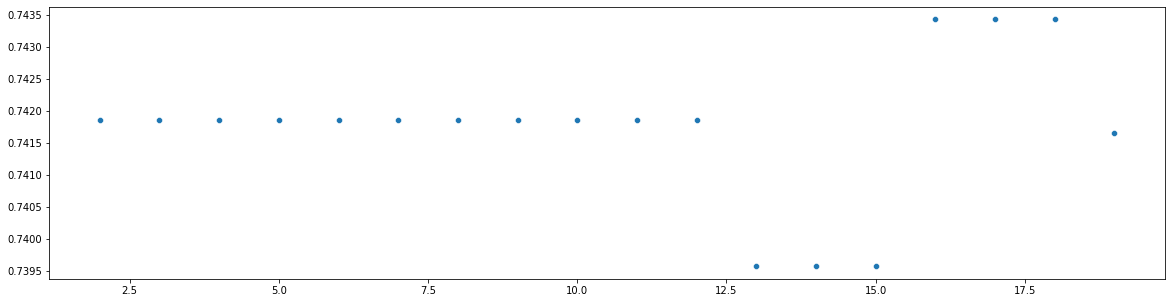

In [68]:
plt.figure(figsize=(20, 5))
x, y = [], []
for i in range(2,20):
    x.append(i)
    dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=i)
    y.append(cross_val_score(dt_clf, X=t.drop('Survived', axis=1), y=t.Survived, cv=kf, scoring="f1").mean())
print(f"Оптимальная значение min_samples_split : {y.index(max(y)) + 1}. Достигается точность: {y[y.index(max(y))]}")
sns.scatterplot(x=x, y=y)

Оптимальная значение min_samples_leaf : 7. Достигается точность: 0.7607150765404811


<AxesSubplot:>

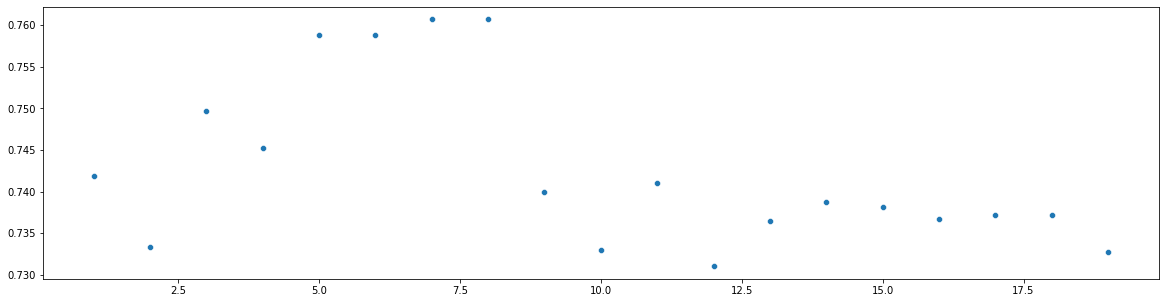

In [69]:
plt.figure(figsize=(20, 5))
x, y = [], []
for i in range(1,20):
    x.append(i)
    dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=i)
    y.append(cross_val_score(dt_clf, X=t.drop('Survived', axis=1), y=t.Survived, cv=kf, scoring="f1").mean())
print(f"Оптимальная значение min_samples_leaf : {y.index(max(y)) + 1}. Достигается точность: {y[y.index(max(y))]}")
sns.scatterplot(x=x, y=y)

Оптимальная значение min_samples_split : 1. Достигается точность: 0.7554582960001213


<AxesSubplot:>

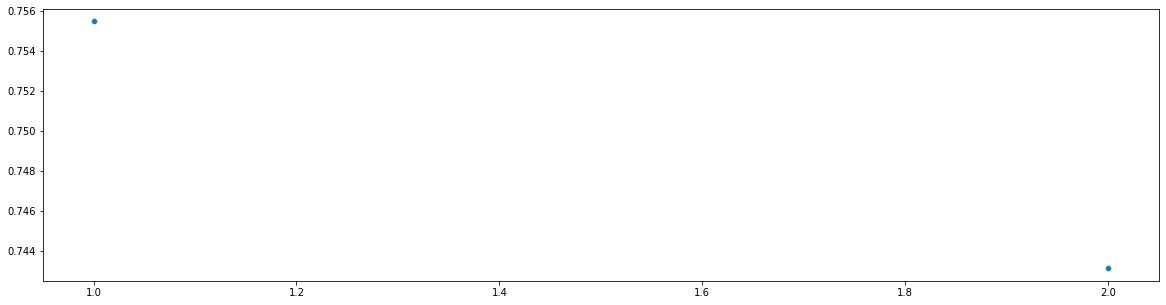

In [70]:
plt.figure(figsize=(20, 5))
x, y = [], []
for i in range(1,len(t.drop('Survived', axis=1).columns)):
    x.append(i)
    dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5, max_features=i)
    y.append(cross_val_score(dt_clf, X=t.drop('Survived', axis=1), y=t.Survived, cv=kf, scoring="f1").mean())
print(f"Оптимальная значение min_samples_split : {y.index(max(y)) + 1}. Достигается точность: {y[y.index(max(y))]}")
sns.scatterplot(x=x, y=y)

Подбор гиперпараметров для остальных классификаторов будем проводить при прогоне пайплайна. 

# 9. Создание конвеера решения для выпуска в production

## 9.1 Пользовательские трансформеры
Создадим свои трансформеры для каждого преобразования.

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

### 9.1.1 Трансформер для заполнения пропусков

In [72]:
class FillNaTransformer(BaseEstimator, TransformerMixin):
    #estimator method
    def fit(self, X, y = None):
        return self
    #transformation
    def transform(self, X, y = None, features = None):
        type(X)
        temp = X.copy()
        if features:
            for i in features:
                if temp.dtypes[i] == 'O':
                    temp[i] = temp[i].fillna(temp[i].mode()[0])
                else:
                    temp[i] = temp[i].fillna(temp[i].median())
        else:
            temp.Age = temp.Age.fillna(temp.Age.median())
            temp.Embarked = temp.Embarked.fillna(temp.Embarked.mode()[0])
            temp.Fare = temp.Fare.fillna(temp.Fare.median())
        return temp

### 9.1.2 Трансформер для обработки выбросов

In [73]:
def bounds_smoothing(feature):
    """Функция принимает набор значений 1-го признака и
    возвращает массив индексов тех значений, которые являются выбросами"""
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    feature = np.where(feature < lower_bound, lower_bound, feature)
    feature = np.where(feature > upper_bound, upper_bound, feature)
    return feature
class SmoothOutliersTransformer(BaseEstimator, TransformerMixin):
    #constructor
    def __init__(self, method = "log1p"):
        self.method = method
    #estimator method
    def fit(self, X, y = None):
        return self
    #transformation
    def transform(self, X, y = None, features = None):
        type(X)
        temp = X.copy()
        if features:
            if self.method == "log1p":
                for i in features:
                    temp[i] = np.log1p(temp[i])
            if self.method == "bounds":
                for i in features:
                    temp[i] = bounds_smoothing(temp[i])
        else:
            if self.method == "log1p":
                temp.Fare = np.log1p(temp.Fare)
                temp.Age = np.log1p(temp.Age)
                temp.SibSp = np.log1p(temp.SibSp)
                temp.Parch = np.log1p(temp.Parch)
            if self.method == "bounds":
                temp.Fare = bounds_smoothing(temp.Fare)
                temp.Age = bounds_smoothing(temp.Age)
                temp.SibSp = bounds_smoothing(temp.SibSp)
                temp.Parch = bounds_smoothing(temp.Parch)
        return temp

### 9.1.3 Трансофрмер для One-hot-encoding

In [74]:
class OnehotTransformer(BaseEstimator, TransformerMixin):
    #estimator method
    def fit(self, X, y = None):
        return self
    #transformation
    def transform(self, X, y = None, features = None):
        type(X)
        temp = X.copy()
        if features:
            for i in features:
                if temp[i].unique().size == 2:
                    temp[i] = temp.drop(i, axis=1).join(pd.get_dummies(temp[i], prefix=i, drop_first=True))
                else:
                    temp[i] = temp.drop(i, axis=1).join(pd.get_dummies(temp[i], prefix=i))
        else:
            temp = temp.drop('Pclass', axis=1).join(pd.get_dummies(temp['Pclass'], prefix='Pclass'))
            temp = temp.drop('Embarked', axis=1).join(pd.get_dummies(temp['Embarked'], prefix='Embarked'))
            temp = temp.drop('Sex', axis=1).join(pd.get_dummies(temp['Sex'], prefix='Sex', drop_first=True))
            if temp.columns.str.contains('AgeCategory').any():
                temp = temp.drop('AgeCategory', axis=1).join(pd.get_dummies(temp['AgeCategory'], prefix='AgeCategory'))
#             if temp.columns.str.contains('NewName').any():
#                 temp = temp.join(pd.get_dummies(temp['NewName'], prefix='NewName'))
        return temp

### 9.1.4 Трансформер для нормализации

In [75]:
class NormalizeTransformer(BaseEstimator, TransformerMixin):
    #constructor
    def __init__(self, method = "minmax"):
        self.method = method
    #estimator method
    def fit(self, X, y = None):
        return self
    #transformation
    def transform(self, X, y = None):
        temp = X.copy()
        if self.method == "minmax":
            min_max_scaler = MinMaxScaler()
            temp['Age'] = min_max_scaler.fit_transform(temp[['Age']])
            temp['Fare'] = min_max_scaler.fit_transform(temp[['Fare']])
            if temp.columns.str.contains('FullFamily').any():
                temp['FullFamily'] = min_max_scaler.fit_transform(temp[['FullFamily']])
        if self.method == "standard":
            standard_scaler = StandardScaler()
            temp['Age'] = standard_scaler.fit_transform(temp[['Age']])
            temp['Fare'] = standard_scaler.fit_transform(temp[['Fare']])
            if temp.columns.str.contains('FullFamily').any():
                temp['FullFamily'] = standard_scaler.fit_transform(temp[['FullFamily']])
        if self.method == "robust":
            robust_scaler = RobustScaler()
            temp['Age'] = robust_scaler.fit_transform(temp[['Age']])
            temp['Fare'] = robust_scaler.fit_transform(temp[['Fare']])
            if temp.columns.str.contains('FullFamily').any():
                temp['FullFamily'] = robust_scaler.fit_transform(temp[['FullFamily']])
        return temp

### 9.1.5 Трансформеры для создания новых признаков

In [76]:
class NewFeaturesTransformer(BaseEstimator, TransformerMixin):
    #constructor
    def __init__(self, features = "all"):
        self.features = features
    #estimator method
    def fit(self, X, y = None):
        return self
    #transformation
    def transform(self, X, y = None):
        temp = X.copy()
        if self.features == "all":
            has_family = (temp.Parch > 0) | (temp.SibSp > 0)
            has_family = has_family.apply(lambda x: int(x))
            has_family.name = "HasFamily"
            temp = temp.join(has_family)
            has_cabin = temp.Cabin.isna()
            has_cabin = has_cabin.apply(lambda x: int(x))
            has_cabin.name = "HasCabin"
            temp = temp.drop('Cabin', axis=1).join(has_cabin)
            temp['Name'] = temp.Name.apply(lambda x: 'Master' if 'Master' in x
                       else 'Miss' if 'Miss' in x
                       else 'Sir' if 'Sir' in x
                       else 'Dr' if 'Dr.' in x
                       else 'Lady' if 'Lady.' in x
                       else 'Mr' if 'Mr.' in x
                       else 'Mrs' if 'Mrs.' in x
                       else 'Other')
            temp['NewName'] = temp['Name'].map(name_mapper)
            full_family = temp.Parch + temp.SibSp
            full_family.name = "FullFamily"
            temp = temp.join(full_family)
            age_category = temp.Age.apply(lambda x: get_age_category(x))
            age_category.name = "AgeCategory"
            temp = temp.join(age_category)
        if self.features == "hasfamily":
            has_family = (temp.Parch > 0) | (temp.SibSp > 0)
            has_family = has_family.apply(lambda x: int(x))
            has_family.name = "HasFamily"
            temp = temp.join(has_family)
        if self.features == "hascabin":
            has_cabin = temp.Cabin.isna()
            has_cabin = has_cabin.apply(lambda x: int(x))
            has_cabin.name = "HasCabin"
            temp = temp.drop('Cabin', axis=1).join(has_cabin)
        if self.features == "fullfamily":
            full_family = temp.Parch + temp.SibSp
            full_family.name = "FullFamily"
            temp = temp.join(full_family)
        if self.features == "agecategory":
            age_category = temp.Age.apply(lambda x: get_age_category(x))
            age_category.name = "AgeCategory"
            temp = temp.join(age_category)
        if self.features == "name":
            temp['Name'] = temp.Name.apply(lambda x: 'Master' if 'Master' in x
                       else 'Miss' if 'Miss' in x
                       else 'Sir' if 'Sir' in x
                       else 'Dr' if 'Dr.' in x
                       else 'Lady' if 'Lady.' in x
                       else 'Mr' if 'Mr.' in x
                       else 'Mrs' if 'Mrs.' in x
                       else 'Other')
            temp['NewName'] = temp['Name'].map(name_mapper)
        return temp

### 9.1.6 Трансформеры для отбора признаков

In [77]:
from sklearn.linear_model import ElasticNet
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names,ranks))

class ChooseFeaturesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ranking=False):
        self.ranking = ranking
    #estimator method
    def fit(self, X, y = None):
        temp = X.copy()
        temp = temp.select_dtypes(include=(int, float,'uint8'))
        if self.ranking:
            reg = ElasticNet(random_state=42)
            reg.fit(temp, y)
            colnames = temp.columns
            rfe = RFE(reg)
            rfe.fit(temp, y)
            self.rfe_support = rfe.get_support()
        return self
    #transformation
    def transform(self, X, y = None):
        type(X)
        temp = X.copy()
        temp = temp.select_dtypes(include=(int, float,'uint8'))
        if self.ranking:
            origin_columns = temp.columns
            for i in range(len(self.rfe_support)):
                if not self.rfe_support[i]:
                    temp = temp.drop(origin_columns[i], axis=1)
        ranking_index = temp.columns
        return temp

## 9.2 Создание пайплайна

Не смотря на то, что при baseline решении лучшую точность показала модель с деревом решении, решил добавить в пайплайн все три модели и разные гиперпараметры.

In [78]:
clean_df = pd.read_csv("/kaggle/input/titanic/train.csv")
pipe = Pipeline([
                ('fillna', FillNaTransformer()),
                ('new_features', NewFeaturesTransformer()),
                ('smooth_outliers', SmoothOutliersTransformer()),
                ('onehot', OnehotTransformer()),
                ('normalize', NormalizeTransformer()),
                ('choose_features', ChooseFeaturesTransformer()),
                ('classifier', DecisionTreeClassifier())
])
search_space = [{'fillna': [FillNaTransformer()],
                'smooth_outliers': [SmoothOutliersTransformer()],
                'smooth_outliers__method' :['log1p', 'bounds', 'none'],
                'onehot': [OnehotTransformer()],
                'normalize': [NormalizeTransformer()],
                'normalize__method': ['minmax','standard','robust'],
                'new_features': [NewFeaturesTransformer()],
                'new_features__features': ['all'],
                'choose_features': [ChooseFeaturesTransformer()],
                'choose_features__ranking': [False, True],
                'classifier': [DecisionTreeClassifier()],
                'classifier__random_state': [1, 5, 10, 13, 21, 42],
                'classifier__max_depth': range(1,10)},
                {'fillna': [FillNaTransformer()],
                'new_features': [NewFeaturesTransformer()],
                'new_features__features': ['all', 'hasfamily', 'hascabin', 'fullfamily', 'agecategory', 'name'],
                'smooth_outliers': [SmoothOutliersTransformer()],
                'smooth_outliers__method' :['log1p', 'bounds', 'none'],
                'onehot': [OnehotTransformer()],
                'normalize': [NormalizeTransformer()],
                'normalize__method': ['minmax','standard','robust'],
                'choose_features': [ChooseFeaturesTransformer()],
                'choose_features__ranking': [False, True],
                'classifier': [LogisticRegression()],
                'classifier__random_state': [42],
                'classifier__solver': ['sag'],
                'classifier__penalty' : ['l2','none']},
                {'fillna': [FillNaTransformer()],
                'new_features': [NewFeaturesTransformer()],
                'new_features__features': ['all', 'hasfamily', 'hascabin', 'fullfamily', 'agecategory', 'name'],
                'smooth_outliers': [SmoothOutliersTransformer()],
                'smooth_outliers__method' :['log1p', 'bounds', 'none'],
                'onehot': [OnehotTransformer()],
                'normalize': [NormalizeTransformer()],
                'normalize__method': ['minmax','standard','robust'],
                'choose_features': [ChooseFeaturesTransformer()],
                'choose_features__ranking': [False, True],
                'classifier': [LogisticRegression()],
                'classifier__random_state': [42],
                'classifier__solver': ['liblinear'],
                'classifier__penalty' : ['l1','l2']},
                {'fillna': [FillNaTransformer()],
                'new_features': [NewFeaturesTransformer()],
                'new_features__features': ['all', 'hasfamily', 'hascabin', 'fullfamily', 'agecategory', 'name'],
                'smooth_outliers': [SmoothOutliersTransformer()],
                'smooth_outliers__method' :['log1p', 'bounds', 'none'],
                'onehot': [OnehotTransformer()],
                'normalize': [NormalizeTransformer()],
                'normalize__method': ['minmax','standard','robust'],
                'choose_features': [ChooseFeaturesTransformer()],
                'choose_features__ranking': [False, True],
                'classifier': [KNeighborsClassifier()],
                'classifier__n_neighbors': [1, 3, 5, 7, 10, 12, 14, 16, 18, 20],
                'classifier__weights': ['uniform', 'distance'],
                'classifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'classifier__p' : [1, 2]}
                ]
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=1, scoring='f1', n_jobs=-1)
ranking_index = []
best_model = gridsearch.fit(clean_df.drop(['PassengerId', 'Survived'], axis=1), clean_df.Survived)

Fitting 5 folds for each of 18684 candidates, totalling 93420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  3.9min
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarni

**Модель с лучшими параметрами:**

In [79]:
best_model.best_params_

{'choose_features': ChooseFeaturesTransformer(),
 'choose_features__ranking': False,
 'classifier': DecisionTreeClassifier(max_depth=4, random_state=1),
 'classifier__max_depth': 4,
 'classifier__random_state': 1,
 'fillna': FillNaTransformer(),
 'new_features': NewFeaturesTransformer(),
 'new_features__features': 'all',
 'normalize': NormalizeTransformer(method='robust'),
 'normalize__method': 'robust',
 'onehot': OnehotTransformer(),
 'smooth_outliers': SmoothOutliersTransformer(method='none'),
 'smooth_outliers__method': 'none'}

**Лучший score на тестовых данных:**

In [80]:
best_model.best_score_

0.768269682757861

**Предсказание с помощью лучшей модели:**

In [81]:
data_for_predict = pd.read_csv("/kaggle/input/titanic/test.csv")
predict = best_model.predict(data_for_predict.drop('PassengerId', axis=1))
submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission.PassengerId = data_for_predict.PassengerId
submission.Survived = predict
submission.to_csv("submission.csv", index=False)

## 9.3 Сохранение модели

In [82]:
import pickle
pickle.dump(best_model, open("my_pipline.pkl", "wb"))
model_from_file = pickle.load(open("my_pipline.pkl", "rb"))